# plot_vorticity.ipynb

Author: Robert M. Frost

University of Oklahoma

Created: 08 February 2024

Purpose: Read in all cases to plot vorticity

In [1]:
import seaborn
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import MultipleLocator
import seaborn
import cmocean
from matplotlib.gridspec import GridSpec
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns

Settings

In [2]:
# directory to save figures
figdir = "/home/rfrost/manuscript_plots/"
# absolute path to directory with probability density function data
pdf_dir = "/home/rfrost/simulations/nc/"
# simulation to analyze
sims = ["full_step_6", "full_step_9", "full_step_12", "full_step_15"]

# height in meters to be plot
height = 6

# start and end timesteps
t0 = 576000
t1 = 1152000
# start and end in hours
t0hr = t0 * 0.05 / 3600
t1hr = t1 * 0.05 / 3600
# spacing of output
dt = 1000

# full path to pdf file
pdf_dir = f"{pdf_dir}{t0}_{t1}_vort_pdf_plot_params_{height}m.nc"

# lists to store stats, roll factor, and length scales
s_all, vort_all, vort_ac_all, vort_ls_all = [], [], [], []
# loop over sims
for sim in sims:
    dnc = f"/home/rfrost/simulations/nc/{sim}/"
    # volumetric stats
    s = xr.open_dataset(f"{dnc}{t0}_{t1}_stats.nc")
    # convert time to hours
    s["time"] = s.time / 3600 + t0hr
    s_all.append(s)

    # vorticity stats
    vort = xr.open_dataset(f"{dnc}{t0}_{t1}_vort.nc")
    # convert time to hours
    vort["time"] = vort.time / 3600 + t0hr
    vort_all.append(vort)

    # vorticity autocorrelation
    vort_ac = xr.open_dataset(f"{dnc}{t0}_{t1}_vort_autocorr.nc")
    # convert time to hours
    vort_ac["time"] = vort_ac.time / 3600 + t0hr
    vort_ac_all.append(vort_ac)

    # vorticity length scales
    vort_ls = xr.open_dataset(f"{dnc}{t0}_{t1}_vort_ls.nc")
    # convert time to hours
    vort_ls["time"] = vort_ls.time / 3600 + t0hr
    vort_ls_all.append(vort_ls)

Plotting set up

In [3]:
# Set the font weight for plot titles
plt.rcParams['axes.titleweight'] = 'bold'

# Set the font weight for x-axis and y-axis labels
plt.rcParams['axes.labelweight'] = 'normal'

plt.rcParams['text.latex.preamble'] = r'\usepackage{bm}'

# Other plotting setup
rc('font', family='sans-serif')
rc('font', weight='normal', size=20)
rc('figure', facecolor='white')

# lists/cmaps for titles and stuff
ug_list = ["6", "9", "12", "15"]
time_colors = ["black", "red", "red", "blue", "blue"]
ug_colors = seaborn.color_palette("flare", 4)
linestyle = ["solid","solid","--","solid","--"]

Eddy turnover for normalization

In [4]:
# find average T_L at hr 9.8333
T_L = (906.23 + 923.55 + 937.68 + 960.66) / 4

tb = -1
tc = 5
td = 11
te = 17
tf = 23

tlmax = max((s_all[0].time-10)*3600/T_L)
tlmin = min((s_all[0].time-10)*3600/T_L)

# normalized times to be plot
jttl = [tb, tc, td, te, tf]
jtall = [abs(((s_all[0].time.values-10)*3600)/T_L - jttl[jt]).argmin() for jt in range(len(jttl))]

## Cross section plots

### End member sfc $\zeta$ cross sections

Text(0.5, 0, '$x$ [km]')

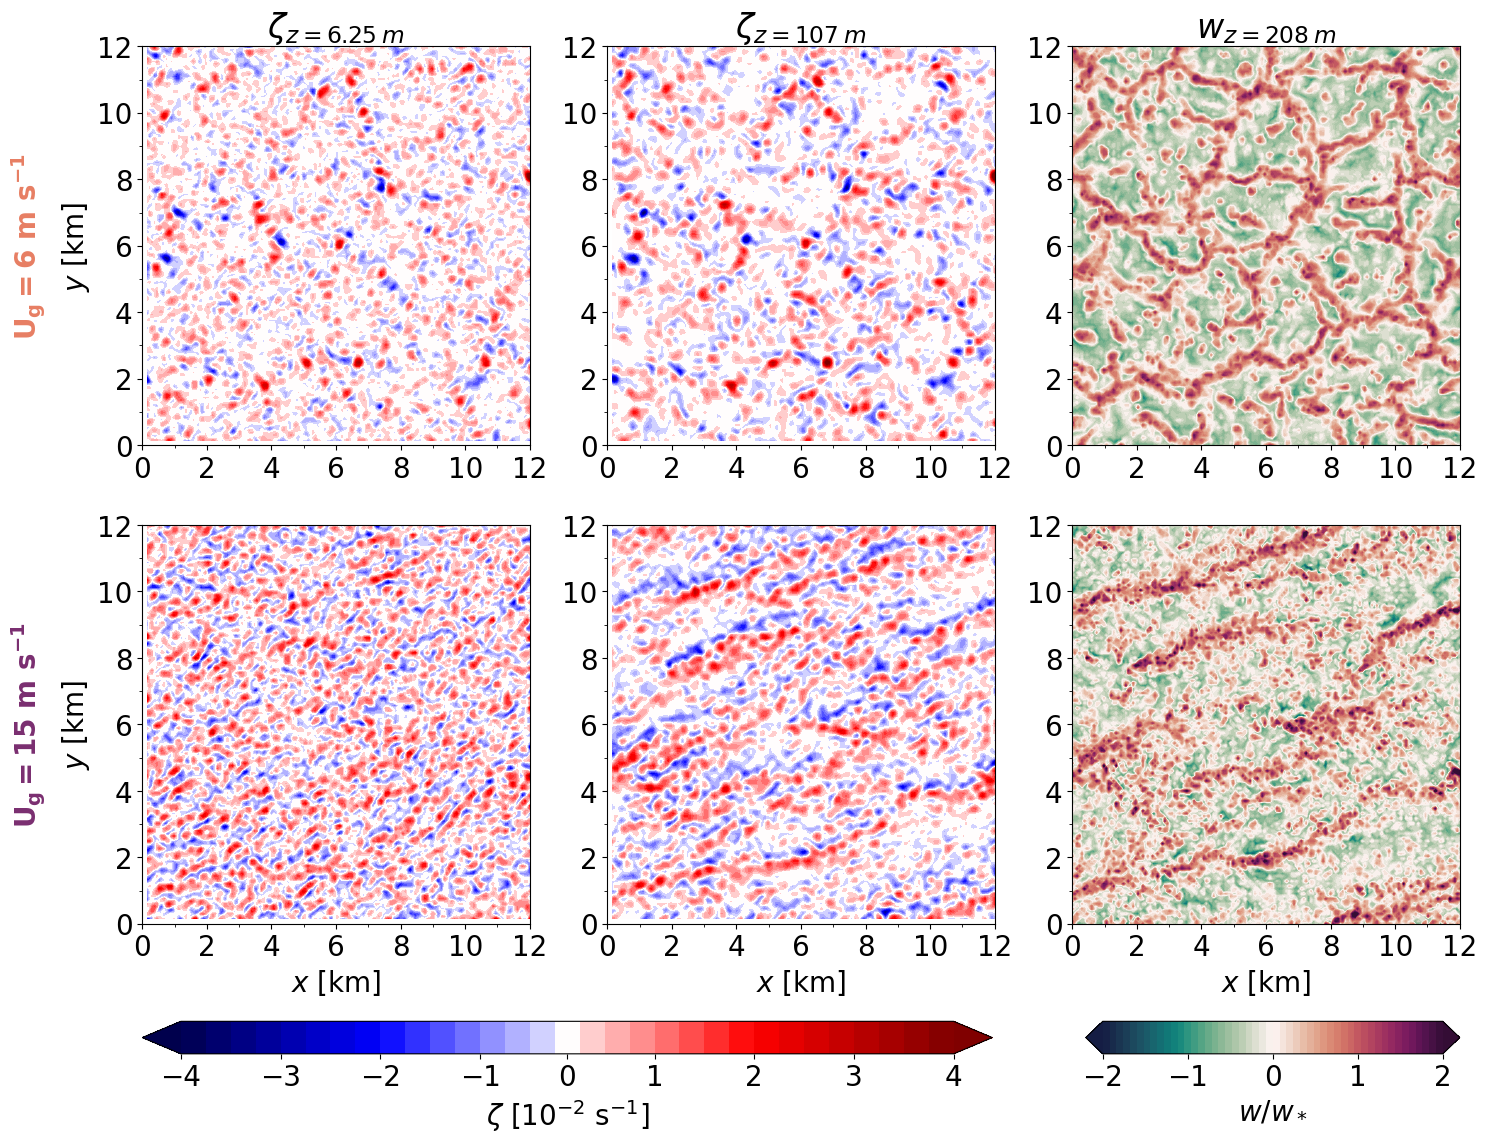

In [5]:
fig = plt.figure(figsize=(17,13))

gs1 = GridSpec(2,3, top=0.95, bottom=0.275)
ax1 = fig.add_subplot(gs1[0,0])
ax2 = fig.add_subplot(gs1[1,0])
ax3 = fig.add_subplot(gs1[0,1])
ax4 = fig.add_subplot(gs1[1,1])
ax5 = fig.add_subplot(gs1[0,2])
ax6 = fig.add_subplot(gs1[1,2])
gs2 = GridSpec(1,1, top=0.20, bottom=0.175, left=0.125, right=0.625)
ax7 = fig.add_subplot(gs2[:])
gs3 = GridSpec(1,1, top=0.20, bottom=0.175, left=0.68, right=0.9)
ax8 = fig.add_subplot(gs3[:])

x, y = s_all[0].x/1000, s_all[0].y/1000

clevs = [-4.  , -3.75, -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25, -2.  ,
       -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25  ,  0.25,
        0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,
        2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.]
clevw = np.linspace(-2,2,51)
cmapw = cmocean.cm.curl
cmap = mpl.cm.seismic

cf = ax1.contourf(x, y, vort_all[0].zeta3[359,:,:,0].rolling(x=3,y=3).mean().T * 10 ** 2, clevs, cmap=cmap, extend="both")
ax1.text(-3.5, 6, "$\\bf{U_g = 6}$ m s$\\bf{^{-1}}$", rotation=90, 
         va="center", ha="center", fontweight="bold", c=ug_colors[0])
ax1.set_title("$\zeta_{z = 6.25 \> m}$")

ax2.contourf(x, y, vort_all[3].zeta3[132,:,:,0].rolling(x=3,y=3).mean().T * 10 ** 2, clevs, cmap=cmap, extend="both")
ax2.text(-3.5, 6, "$\\bf{U_g = 15}$ m s$\\bf{^{-1}}$", rotation=90, 
         va="center", ha="center", fontweight="bold", c=ug_colors[3])

ax3.contourf(x, y, vort_all[0].zeta3[359,:,:,8].rolling(x=3,y=3).mean().T * 10 ** 2, clevs, cmap=cmap, extend="both")
ax3.set_title("$\zeta_{z = 107 \> m}$")
ax4.contourf(x, y, s_all[3].zeta[132,:,:,8].rolling(x=3,y=3).mean().T * 10 ** 2, clevs, cmap=cmap, extend="both")

cfw = ax5.contourf(x, y, s_all[0].w[359,:,:,16].T / s_all[0].wstar[359], clevw, cmap=cmapw, extend="both")
ax5.set_title("$w_{z = 208 \> m}$")
ax6.contourf(x, y, s_all[3].w[132,:,:,16].T / s_all[3].wstar[132], clevw, cmap=cmapw, extend="both")

cbar = plt.colorbar(cf, ax7, orientation="horizontal")
cbar.set_label("$\zeta$ [$10^{-2}$ s$^{-1}$]")
cbar.set_ticks(np.arange(-4, 4.1, 1))

cbar = plt.colorbar(cfw, ax8, orientation="horizontal")
cbar.set_label("$w / w_*$")
cbar.set_ticks(np.arange(-2,2.1,1))

axes = [ax1, ax2, ax3, ax4, ax5, ax6]
for ax in axes:
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.yaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.yaxis.set_minor_locator(MultipleLocator(1))
    # ax.set_xlim(4,8)
    # ax.set_ylim(4,8)

ax1.set_ylabel("$y$ [km]")
ax2.set_ylabel("$y$ [km]")
ax2.set_xlabel("$x$ [km]")
ax4.set_xlabel("$x$ [km]")
ax6.set_xlabel("$x$ [km]")

### 4x5 sfc $\zeta$ cross sections

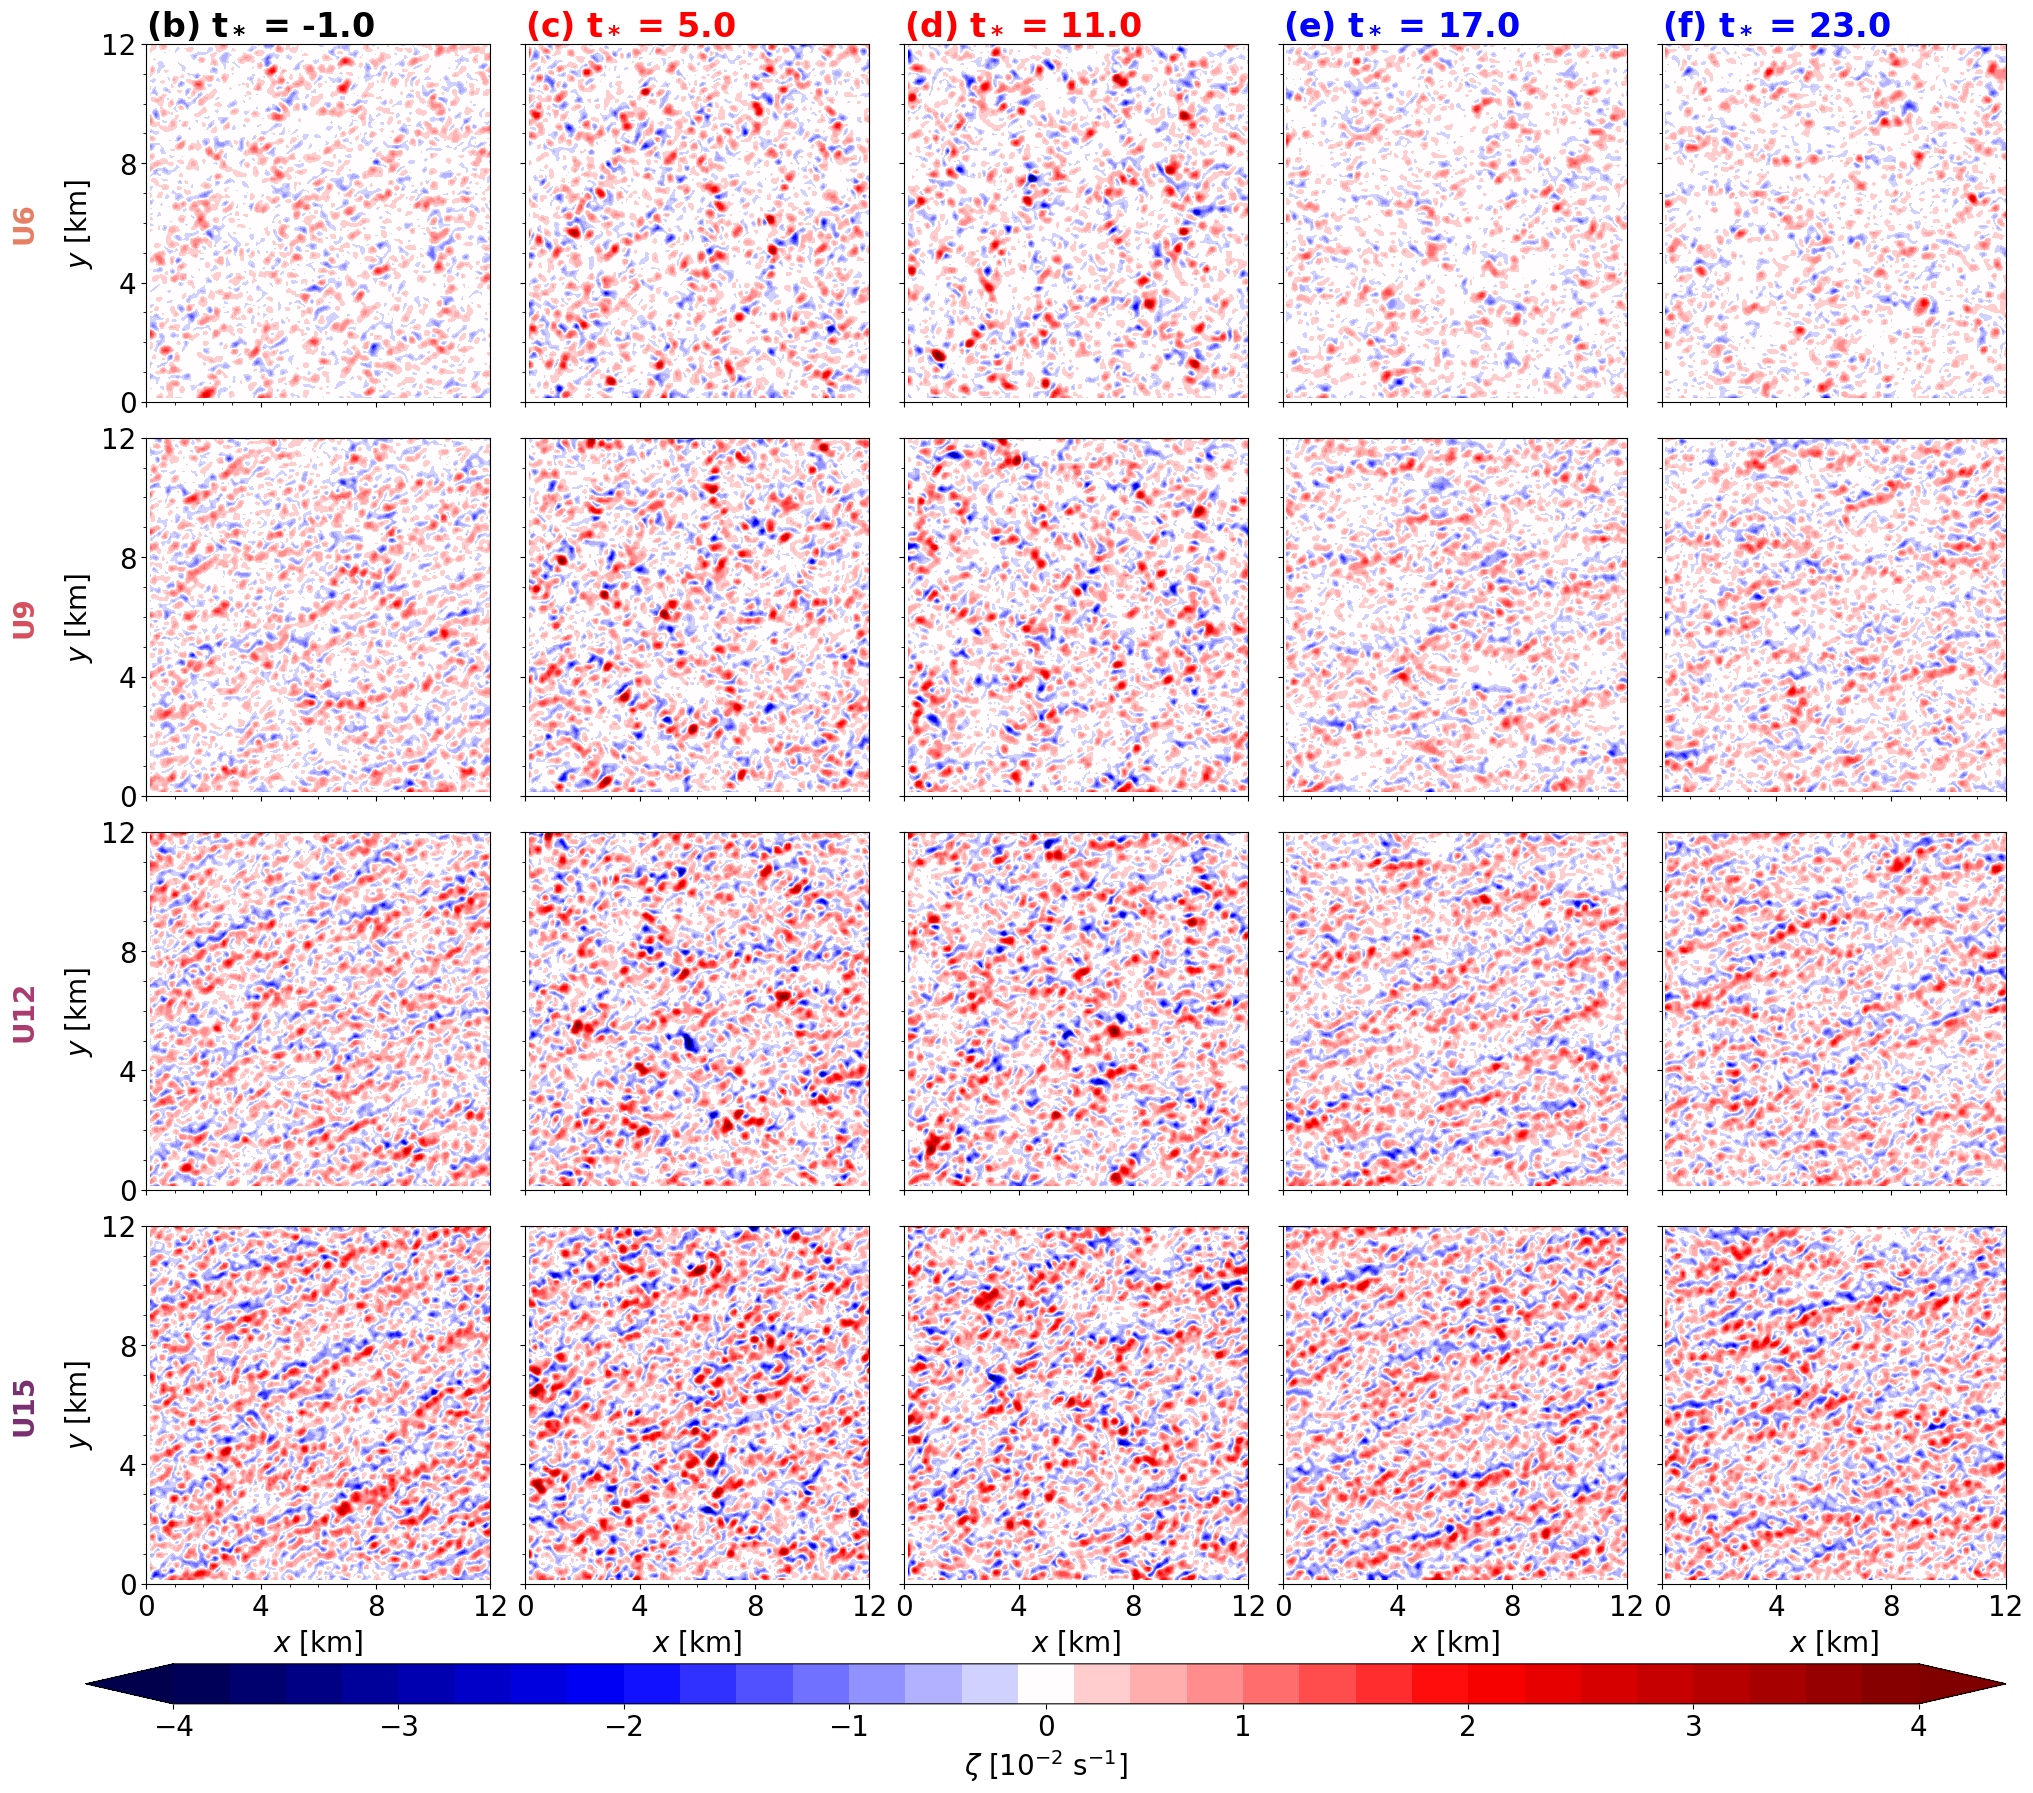

In [6]:
fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(24,20), sharex=True, sharey=True)

# contourf plots
clevs = [-4.  , -3.75, -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25, -2.  ,
       -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25  ,  0.25,
        0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,
        2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.]

# 6 m/s
sim = 0
time_values = [vort_all[sim].time[jtall[i]].values for i in range(len(jtall))]
zeta3_values = [vort_all[sim].zeta3[jtall[i]].rolling(x=3,y=3).mean() for i in range(len(jtall))]
wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
zi_values = [s_all[sim].zi[jtall[i]] for i in range(len(jtall))]
x_values = s_all[sim].x
y_values = s_all[sim].y
lab = ["b", "c", "d", "e", "f"]
for j, iax in enumerate(ax[sim,:]):
    cf = iax.contourf(x_values/1000, y_values/1000, 
                      zeta3_values[j][:,:,4].T * 10 ** 2,
                      cmap=mpl.cm.seismic, levels=clevs, extend="both")
    iax.xaxis.set_major_locator(MultipleLocator(4))
    iax.xaxis.set_minor_locator(MultipleLocator(1))
    iax.yaxis.set_major_locator(MultipleLocator(4))
    iax.yaxis.set_minor_locator(MultipleLocator(1))
    iax.set_title(f"({lab[j]}) $\\bf{{t_*}}$ = {round(((s_all[0].time[jtall[j]].values-10)*3600)/T_L,1)}", 
                  loc="left", c=time_colors[j])
    # Manually rasterize each collection in the ContourSet
    for collection in cf.collections:
        collection.set_rasterized(True)

# 9 m/s
sim = 1
time_values = [vort_all[sim].time[jtall[i]].values for i in range(len(jtall))]
zeta3_values = [vort_all[sim].zeta3[jtall[i]].rolling(x=3,y=3).mean() for i in range(len(jtall))]
wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
zi_values = [s_all[sim].zi[jtall[i]] for i in range(len(jtall))]
x_values = s_all[sim].x
y_values = s_all[sim].y
for j, iax in enumerate(ax[sim,:]):
    cf = iax.contourf(x_values/1000, y_values/1000, 
                      zeta3_values[j][:,:,4].T * 10 ** 2,
                      cmap=mpl.cm.seismic, levels=clevs, extend="both")
    iax.xaxis.set_major_locator(MultipleLocator(4))
    iax.xaxis.set_minor_locator(MultipleLocator(1))
    iax.yaxis.set_major_locator(MultipleLocator(4))
    iax.yaxis.set_minor_locator(MultipleLocator(1))
    # Manually rasterize each collection in the ContourSet
    for collection in cf.collections:
        collection.set_rasterized(True)

# 12 m/s
sim = 2
time_values = [vort_all[sim].time[jtall[i]].values for i in range(len(jtall))]
zeta3_values = [vort_all[sim].zeta3[jtall[i]].rolling(x=3,y=3).mean() for i in range(len(jtall))]
wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
zi_values = [s_all[sim].zi[jtall[i]] for i in range(len(jtall))]
x_values = s_all[sim].x
y_values = s_all[sim].y
for j, iax in enumerate(ax[sim,:]):
    cf = iax.contourf(x_values/1000, y_values/1000, 
                      zeta3_values[j][:,:,4].T * 10 ** 2,
                      cmap=mpl.cm.seismic, levels=clevs, extend="both")
    iax.xaxis.set_major_locator(MultipleLocator(4))
    iax.xaxis.set_minor_locator(MultipleLocator(1))
    iax.yaxis.set_major_locator(MultipleLocator(4))
    iax.yaxis.set_minor_locator(MultipleLocator(1))
    # Manually rasterize each collection in the ContourSet
    for collection in cf.collections:
        collection.set_rasterized(True)

# 15 m/s
sim = 3
time_values = [vort_all[sim].time[jtall[i]].values for i in range(len(jtall))]
zeta3_values = [vort_all[sim].zeta3[jtall[i]].rolling(x=3,y=3).mean() for i in range(len(jtall))]
wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
zi_values = [s_all[sim].zi[jtall[i]] for i in range(len(jtall))]
x_values = s_all[sim].x
y_values = s_all[sim].y
for j, iax in enumerate(ax[sim,:]):
    cf = iax.contourf(x_values/1000, y_values/1000, 
                      zeta3_values[j][:,:,4].T* 10 ** 2,
                      cmap=mpl.cm.seismic, levels=clevs, extend="both")
    iax.xaxis.set_major_locator(MultipleLocator(4))
    iax.xaxis.set_minor_locator(MultipleLocator(1))
    iax.yaxis.set_major_locator(MultipleLocator(4))
    iax.yaxis.set_minor_locator(MultipleLocator(1))
    # Manually rasterize each collection in the ContourSet
    for collection in cf.collections:
        collection.set_rasterized(True)

# Create a new axis for the colorbar
cbar_ax = fig.add_axes([0.1, 0.05, 0.8, 0.02])  # Adjust the position and size as needed
# Add the colorbar
cbar = plt.colorbar(cf, cax=cbar_ax, orientation='horizontal')
cbar.set_label("$\zeta$ [$10^{-2}$ s$^{-1}$]")  # Customize the colorbar label
cbar.set_ticks(np.arange(-4,4.1,1))

# sim labels
case = ["6", "9", "12", "15"]
for i, iax in enumerate(ax[:,0]):
    iax.text(-4.25, 6, f"U{case[i]}", 
            rotation=90, fontsize=20, va="center", ha="center", weight="bold", c=ug_colors[i])
    iax.set_ylabel("$y$ [km]")
    
# axis labels
for i, iax in enumerate(ax[3,:]):
    iax.set_xlabel("$x$ [km]")

plt.subplots_adjust(hspace=0.10, wspace=0.1)

### 0-100m $\zeta$

In [7]:
# for i, v in enumerate(v_all):
#     # v["zeta3_100"] = v.zeta3.where(v.z < 110, drop=True)
#     v["zeta3_100_int"] = v.zeta3[:,:,:,:8].integrate(coord="z")

In [8]:
# fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(24,20), sharex=True, sharey=True)

# # contourf plots
# clevs = [-4.  , -3.75, -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25, -2.  ,
#        -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25  ,  0.25,
#         0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,
#         2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.]

# # 6 m/s
# sim = 0
# time_values = [v_all[sim].time[jtall[i]].values for i in range(len(jtall))]
# zeta3_values = [v_all[sim].zeta3_100_int[jtall[i]].rolling(x=3,y=3).mean() for i in range(len(jtall))]
# wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
# zi_values = [s_all[sim].zi[jtall[i]] for i in range(len(jtall))]
# x_values = s_all[sim].x
# y_values = s_all[sim].y
# lab = ["b", "c", "d", "e", "f"]
# for j, iax in enumerate(ax[sim,:]):
#     cf = iax.contourf(x_values/1000, y_values/1000, 
#                       zeta3_values[j].T,
#                       cmap=mpl.cm.seismic, levels=clevs, extend="both")
#     iax.xaxis.set_major_locator(MultipleLocator(4))
#     iax.xaxis.set_minor_locator(MultipleLocator(1))
#     iax.yaxis.set_major_locator(MultipleLocator(4))
#     iax.yaxis.set_minor_locator(MultipleLocator(1))
#     iax.set_title(f"({lab[j]}) $\\bf{{t_*}}$ = {round(((s_all[0].time[jtall[j]].values-10)*3600)/T_L,1)}", 
#                   loc="left", c=time_colors[j])
#     # Manually rasterize each collection in the ContourSet
#     for collection in cf.collections:
#         collection.set_rasterized(True)

# # 9 m/s
# sim = 1
# time_values = [v_all[sim].time[jtall[i]].values for i in range(len(jtall))]
# zeta3_values = [v_all[sim].zeta3_100_int[jtall[i]].rolling(x=3,y=3).mean() for i in range(len(jtall))]
# wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
# zi_values = [s_all[sim].zi[jtall[i]] for i in range(len(jtall))]
# x_values = s_all[sim].x
# y_values = s_all[sim].y
# for j, iax in enumerate(ax[sim,:]):
#     cf = iax.contourf(x_values/1000, y_values/1000, 
#                       zeta3_values[j].T,
#                       cmap=mpl.cm.seismic, levels=clevs, extend="both")
#     iax.xaxis.set_major_locator(MultipleLocator(4))
#     iax.xaxis.set_minor_locator(MultipleLocator(1))
#     iax.yaxis.set_major_locator(MultipleLocator(4))
#     iax.yaxis.set_minor_locator(MultipleLocator(1))
#     # Manually rasterize each collection in the ContourSet
#     for collection in cf.collections:
#         collection.set_rasterized(True)

# # 12 m/s
# sim = 2
# time_values = [v_all[sim].time[jtall[i]].values for i in range(len(jtall))]
# zeta3_values = [v_all[sim].zeta3_100_int[jtall[i]].rolling(x=3,y=3).mean() for i in range(len(jtall))]
# wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
# zi_values = [s_all[sim].zi[jtall[i]] for i in range(len(jtall))]
# x_values = s_all[sim].x
# y_values = s_all[sim].y
# for j, iax in enumerate(ax[sim,:]):
#     cf = iax.contourf(x_values/1000, y_values/1000, 
#                       zeta3_values[j].T,
#                       cmap=mpl.cm.seismic, levels=clevs, extend="both")
#     iax.xaxis.set_major_locator(MultipleLocator(4))
#     iax.xaxis.set_minor_locator(MultipleLocator(1))
#     iax.yaxis.set_major_locator(MultipleLocator(4))
#     iax.yaxis.set_minor_locator(MultipleLocator(1))
#     # Manually rasterize each collection in the ContourSet
#     for collection in cf.collections:
#         collection.set_rasterized(True)

# # 15 m/s
# sim = 3
# time_values = [v_all[sim].time[jtall[i]].values for i in range(len(jtall))]
# zeta3_values = [v_all[sim].zeta3_100_int[jtall[i]].rolling(x=3,y=3).mean() for i in range(len(jtall))]
# wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
# zi_values = [s_all[sim].zi[jtall[i]] for i in range(len(jtall))]
# x_values = s_all[sim].x
# y_values = s_all[sim].y
# for j, iax in enumerate(ax[sim,:]):
#     cf = iax.contourf(x_values/1000, y_values/1000, 
#                       zeta3_values[j].T,
#                       cmap=mpl.cm.seismic, levels=clevs, extend="both")
#     iax.xaxis.set_major_locator(MultipleLocator(4))
#     iax.xaxis.set_minor_locator(MultipleLocator(1))
#     iax.yaxis.set_major_locator(MultipleLocator(4))
#     iax.yaxis.set_minor_locator(MultipleLocator(1))
#     # Manually rasterize each collection in the ContourSet
#     for collection in cf.collections:
#         collection.set_rasterized(True)

# # Create a new axis for the colorbar
# cbar_ax = fig.add_axes([0.1, 0.05, 0.8, 0.02])  # Adjust the position and size as needed
# # Add the colorbar
# cbar = plt.colorbar(cf, cax=cbar_ax, orientation='horizontal')
# cbar.set_label("0-100 m $\zeta$ [s$^{-1}$]")  # Customize the colorbar label
# cbar.set_ticks(np.arange(-4,4.1,1))

# # sim labels
# case = ["6", "9", "12", "15"]
# for i, iax in enumerate(ax[:,0]):
#     iax.text(-4.25, 6, f"U{case[i]}", 
#             rotation=90, fontsize=20, va="center", ha="center", weight="bold", c=ug_colors[i])
#     iax.set_ylabel("$y$ [km]")
    
# # axis labels
# for i, iax in enumerate(ax[3,:]):
#     iax.set_xlabel("$x$ [km]")

# plt.subplots_adjust(hspace=0.10, wspace=0.1)

## Time series plots

In [9]:
for i, v in enumerate(vort_all):
    v["abs_omega_mean"] = v.zeta1_abs_mean + v.zeta2_abs_mean + v.zeta3_abs_mean
    v["abs_horiz_omega_mean"] = v.zeta1_abs_mean + v.zeta2_abs_mean

### 50 m $\langle \zeta^+ \rangle$, $\langle |\omega_h| \rangle$, $\langle |\omega| \rangle$, $\langle \zeta^+ \rangle / \langle |\omega| \rangle$

Text(13.15, 0.65, '$t_1$')

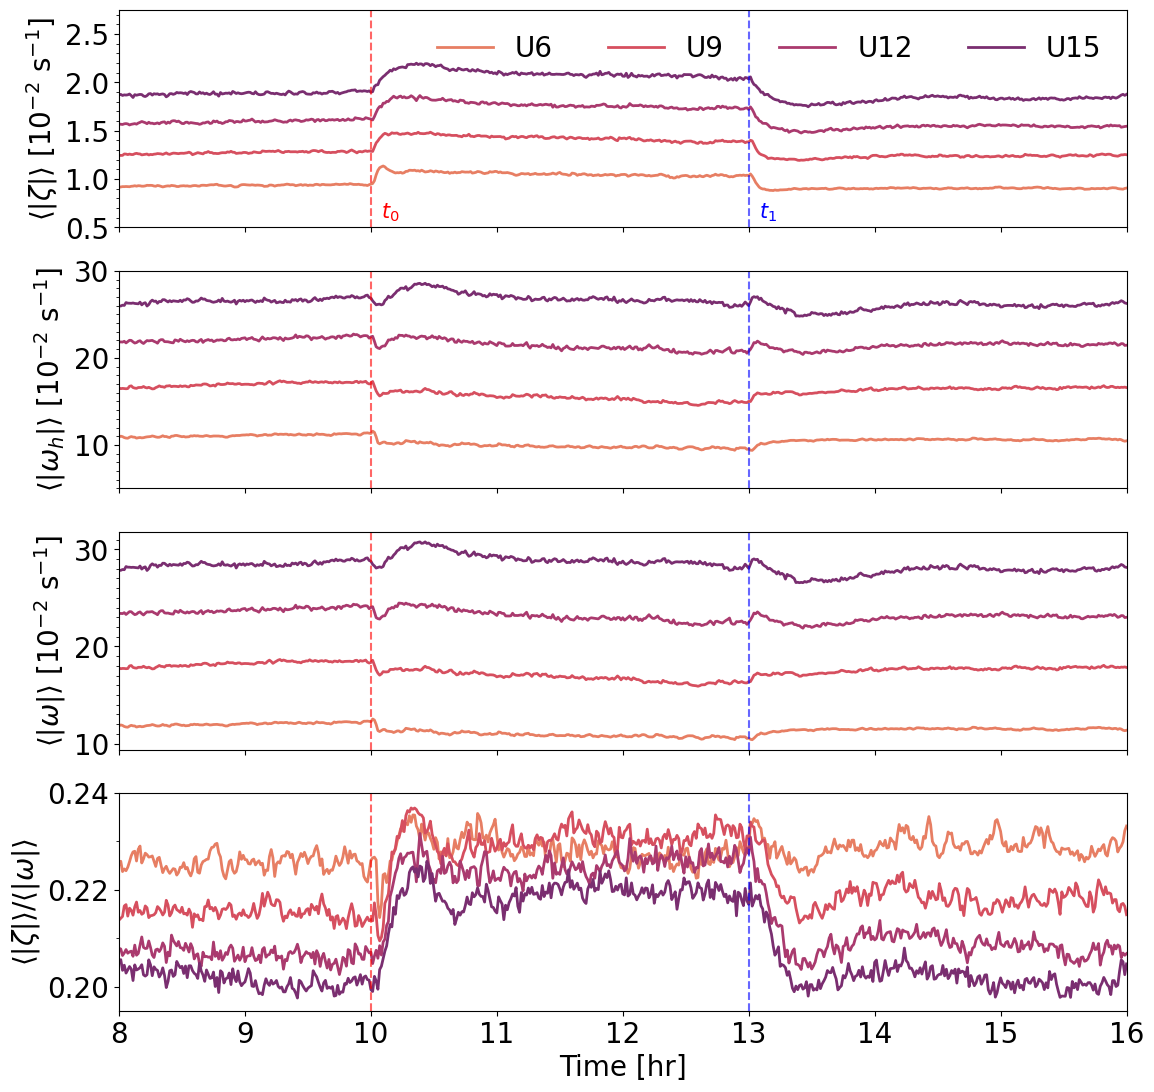

In [10]:
lab = ["U6", "U9", "U12", "U15"]

hidx = 0

fig, ax = plt.subplots(nrows=4, figsize=(13,13), sharex=True)

for i, v in enumerate(vort_all):
    ax[0].plot(v.time, v.zeta3_abs_mean[:,hidx] * 10 ** 2, 
            label=lab[i], c=ug_colors[i], lw=2)
    ax[1].plot(v.time, v.abs_horiz_omega_mean[:,hidx] * 10 ** 2, c=ug_colors[i], lw=2)
    ax[2].plot(v.time, v.abs_omega_mean[:,hidx] * 10 ** 2, c=ug_colors[i], lw=2)
    ax[3].plot(v.time, v.zeta3_abs_mean[:,hidx] / v.abs_omega_mean[:,4], c=ug_colors[i], lw=2)

ax[0].set_ylabel("$\\langle |\zeta| \\rangle$ [10$^{-2}$ s$^{-1}$]")
ax[1].set_ylabel("$\\langle |\omega_h| \\rangle$ [10$^{-2}$ s$^{-1}$]")
ax[2].set_ylabel("$\\langle |\omega| \\rangle$ [10$^{-2}$ s$^{-1}$]")
ax[3].set_ylabel("$\\langle |\zeta| \\rangle / \\langle |\omega| \\rangle$")
ax[3].set_xlabel("Time [hr]")

ax[0].set_ylim(0.5,2.75)
ax[1].set_ylim(5,30)
# ax[2].set_ylim(3,11)
ax[3].set_ylim(0.195,0.24)
ax[3].set_xlim(8,16)

ax[0].yaxis.set_major_locator(MultipleLocator(0.5))
ax[0].yaxis.set_minor_locator(MultipleLocator(0.1))
ax[1].yaxis.set_major_locator(MultipleLocator(10))
ax[1].yaxis.set_minor_locator(MultipleLocator(1))
ax[2].yaxis.set_major_locator(MultipleLocator(10))
ax[2].yaxis.set_minor_locator(MultipleLocator(1))
ax[3].yaxis.set_major_locator(MultipleLocator(0.02))
ax[3].yaxis.set_minor_locator(MultipleLocator(0.01))
# ax[3].xaxis.set_major_locator(MultipleLocator(2))
# ax[3].xaxis.set_minor_locator(MultipleLocator(1))

ax[0].legend(frameon=False, ncols=4, loc="upper right")

for iax in ax:
    # vertical lines
    iax.axvline(x=10, c="red", lw=1.5, alpha=0.6, ls="--")
    iax.axvline(x=13, c="blue", lw=1.5, alpha=0.6, ls="--")

# text above lines
ax[0].text(10.15, 0.65, f"$t_0$", ha="center", va="center", c="red", fontsize=15)
ax[0].text(13.15, 0.65, f"$t_1$", ha="center", va="center", c="blue", fontsize=15)

### Parameter space / hysteresis plots

In [11]:
for i, s in enumerate(s_all):
    s["zi_L_rolling"] = s.zi_L.rolling(time=6).mean(0)

for i, v in enumerate(vort_all):
    v["zeta3_pos_mean_rolling"] = v.zeta3_pos_mean.rolling(time=6).mean()

In [12]:
colors2 = ["black", "red", "blue"]

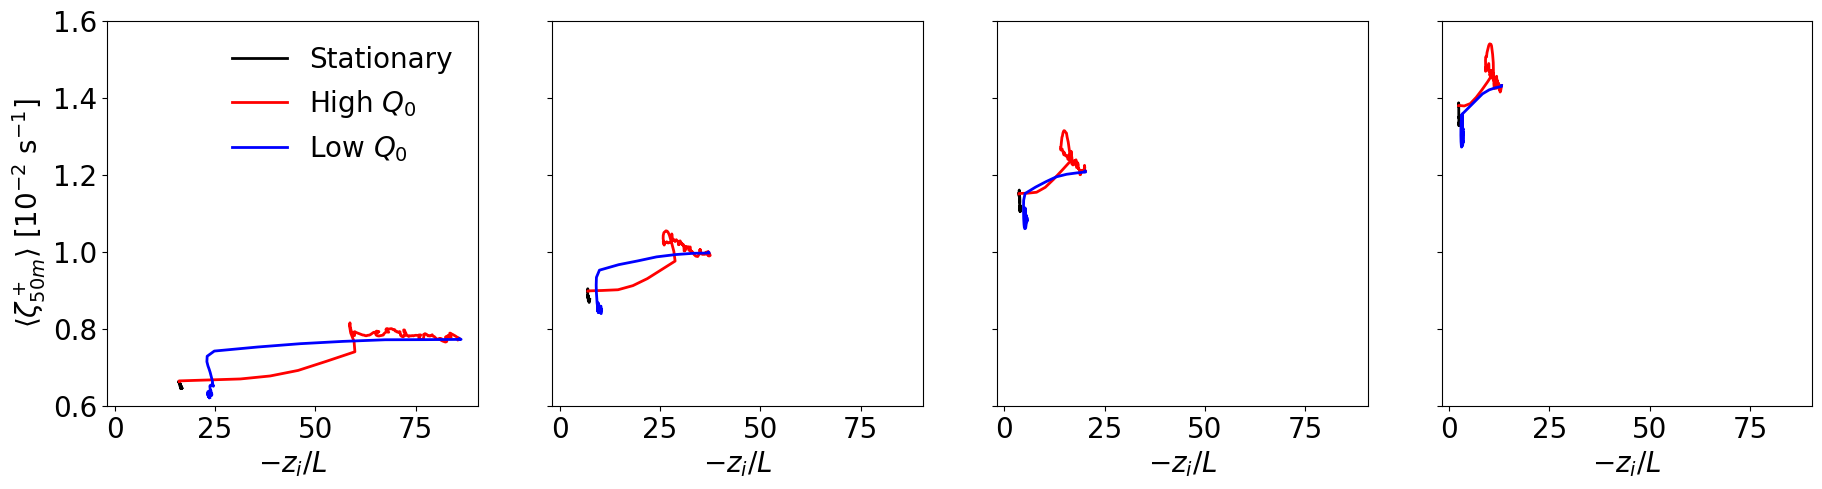

In [13]:
colors2 = ["black", "red", "blue"]

fig, ax = plt.subplots(figsize=(22,5), ncols=4, sharex=True, sharey=True)

sim = 0
ax[sim].plot(s_all[sim].zi_L_rolling[:144], 
             vort_all[sim].zeta3_pos_mean_rolling[:144,4] * 10 ** 2, 
             label="Stationary", c=colors2[0], lw=2)
ax[sim].plot(s_all[sim].zi_L_rolling[143:360], 
             vort_all[sim].zeta3_pos_mean_rolling[143:360,4] * 10 ** 2, 
             label="High $Q_0$", c=colors2[1], lw=2)
ax[sim].plot(s_all[sim].zi_L_rolling[359:], 
             vort_all[sim].zeta3_pos_mean_rolling[359:,4] * 10 ** 2, 
             label="Low $Q_0$", c=colors2[2], lw=2)

sim = 1
ax[sim].plot(s_all[sim].zi_L_rolling[:144], 
             vort_all[sim].zeta3_pos_mean_rolling[:144,4] * 10 ** 2, 
             label="Stationary", c=colors2[0], lw=2)
ax[sim].plot(s_all[sim].zi_L_rolling[143:360], 
             vort_all[sim].zeta3_pos_mean_rolling[143:360,4] * 10 ** 2, 
             label="High $Q_0$", c=colors2[1], lw=2)
ax[sim].plot(s_all[sim].zi_L_rolling[359:], 
             vort_all[sim].zeta3_pos_mean_rolling[359:,4] * 10 ** 2, 
             label="Low $Q_0$", c=colors2[2], lw=2)

sim = 2
ax[sim].plot(s_all[sim].zi_L_rolling[:144], 
             vort_all[sim].zeta3_pos_mean_rolling[:144,4] * 10 ** 2, 
             label="Stationary", c=colors2[0], lw=2)
ax[sim].plot(s_all[sim].zi_L_rolling[143:360], 
             vort_all[sim].zeta3_pos_mean_rolling[143:360,4] * 10 ** 2, 
             label="High $Q_0$", c=colors2[1], lw=2)
ax[sim].plot(s_all[sim].zi_L_rolling[359:], 
             vort_all[sim].zeta3_pos_mean_rolling[359:,4] * 10 ** 2, 
             label="Low $Q_0$", c=colors2[2], lw=2)

sim = 3
ax[sim].plot(s_all[sim].zi_L_rolling[:144], 
             vort_all[sim].zeta3_pos_mean_rolling[:144,4] * 10 ** 2, 
             label="Stationary", c=colors2[0], lw=2)
ax[sim].plot(s_all[sim].zi_L_rolling[143:360], 
             vort_all[sim].zeta3_pos_mean_rolling[143:360,4] * 10 ** 2, 
             label="High $Q_0$", c=colors2[1], lw=2)
ax[sim].plot(s_all[sim].zi_L_rolling[359:], 
             vort_all[sim].zeta3_pos_mean_rolling[359:,4] * 10 ** 2, 
             label="Low $Q_0$", c=colors2[2], lw=2)

ax[0].legend(frameon=False)

ax[0].set_ylabel("$\\langle \zeta^+_{50 m} \\rangle$ [10$^{-2}$ s$^{-1}$]")
ax[0].set_ylim(0.6,1.6)
for iax in ax:
    iax.set_xlabel("$-z_i / L$")

In [14]:
# create vorticity arrays of all simulations
full_vort_array_stationary = np.concatenate((
    vort_all[0].zeta3_pos_mean[:144,4].values,
    vort_all[1].zeta3_pos_mean[:144,4].values,
    vort_all[2].zeta3_pos_mean[:144,4].values,
    vort_all[3].zeta3_pos_mean[:144,4].values
    ))
full_vort_array_high_Q0 = np.concatenate((
    vort_all[0].zeta3_pos_mean[145:360,4].values,
    vort_all[1].zeta3_pos_mean[145:360,4].values,
    vort_all[2].zeta3_pos_mean[145:360,4].values,
    vort_all[3].zeta3_pos_mean[145:360,4].values
    ))
full_vort_array_low_Q0 = np.concatenate((
    vort_all[0].zeta3_pos_mean[361:,4].values,
    vort_all[1].zeta3_pos_mean[361:,4].values,
    vort_all[2].zeta3_pos_mean[361:,4].values,
    vort_all[3].zeta3_pos_mean[361:,4].values
    ))
# create full -zi / L array of all simulations
full_ziL_array_stationary = np.concatenate((
    s_all[0].zi_L[:144].values,
    s_all[1].zi_L[:144].values,
    s_all[2].zi_L[:144].values,
    s_all[3].zi_L[:144].values))
full_ziL_array_high_Q0 = np.concatenate((
    s_all[0].zi_L[145:360].values,
    s_all[1].zi_L[145:360].values,
    s_all[2].zi_L[145:360].values,
    s_all[3].zi_L[145:360].values))
full_ziL_array_low_Q0 = np.concatenate((
    s_all[0].zi_L[361:].values,
    s_all[1].zi_L[361:].values,
    s_all[2].zi_L[361:].values,
    s_all[3].zi_L[361:].values))

Text(0, 0.5, '$\\langle \\zeta^+_{6.25 m} \\rangle$ [10$^{-2}$ s$^{-1}$]')

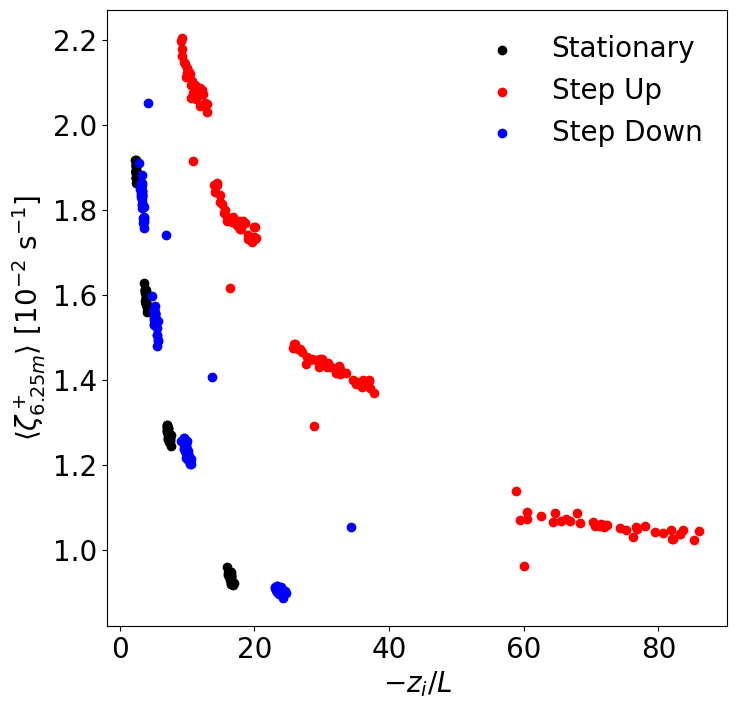

In [15]:
fig, ax = plt.subplots(figsize=(8,8))

spacing = 6
h_idx = 0

# line plots
# ax.plot(full_ziL_array_stationary[::spacing], full_vort_array_stationary[::spacing], c=colors2[0])
# ax.plot(full_ziL_array_high_Q0[::spacing], full_vort_array_high_Q0[::spacing], c=colors2[1])
# ax.plot(full_ziL_array_low_Q0[::spacing], full_vort_array_low_Q0[::spacing], c=colors2[2])
# scatter plots
for i in range(4):
    ax.scatter(s_all[i].zi_L[:144:spacing], 
               vort_all[i].zeta3_pos_mean[:144:spacing,h_idx] * 10 ** 2,
               c=colors2[0])
    ax.scatter(s_all[i].zi_L[145:360:spacing],
               vort_all[i].zeta3_pos_mean[145:360:spacing,h_idx] * 10 ** 2,
               c=colors2[1])
    ax.scatter(s_all[i].zi_L[361:577:spacing],
               vort_all[i].zeta3_pos_mean[361:577:spacing,h_idx] * 10 ** 2,
               c=colors2[2])
    
ax.legend(["Stationary", "Step Up", "Step Down"], frameon=False)

# ax.set_ylim(0.6,1.6)

ax.set_xlabel("$-z_i / L$")
ax.set_ylabel("$\\langle \zeta^+_{6.25 m} \\rangle$ [10$^{-2}$ s$^{-1}$]")

Text(0, 0.5, '$\\langle | \\zeta_{6.25 m} | \\rangle_{xy}$ [10$^-2$ s$^-1$]')

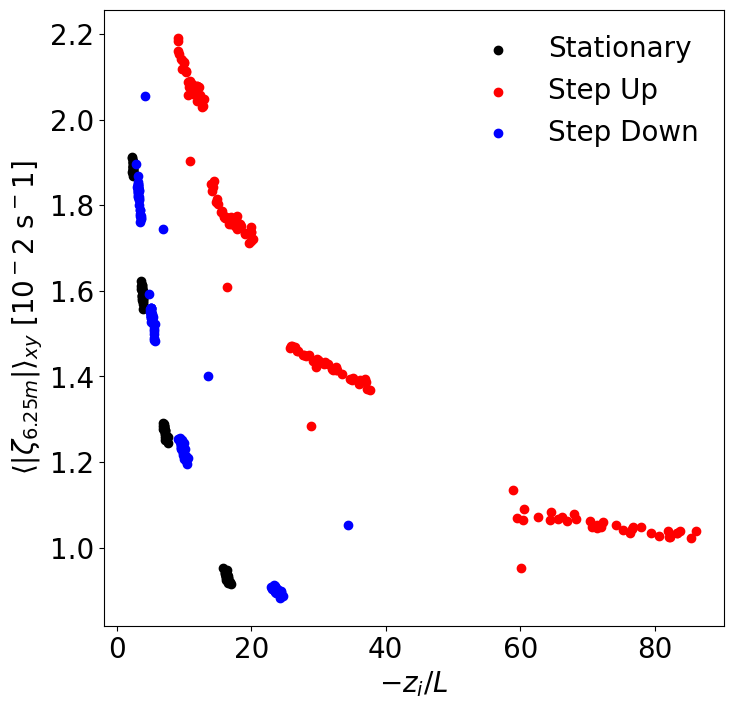

In [16]:
fig, ax = plt.subplots(figsize=(8,8))

spacing = 6
h_idx = 0

# scatter plots
for i in range(4):
    ax.scatter(s_all[i].zi_L[:144:spacing], 
               vort_all[i].zeta3_abs_mean[:144:spacing,h_idx] * 10 ** 2,
               c=colors2[0])
    ax.scatter(s_all[i].zi_L[145:360:spacing],
               vort_all[i].zeta3_abs_mean[145:360:spacing,h_idx] * 10 ** 2,
               c=colors2[1])
    ax.scatter(s_all[i].zi_L[361:577:spacing],
               vort_all[i].zeta3_abs_mean[361:577:spacing,h_idx] * 10 ** 2,
               c=colors2[2])
    
ax.legend(["Stationary", "Step Up", "Step Down"], frameon=False)

# ax.set_ylim(0.6,1.6)

ax.set_xlabel("$-z_i / L$")
ax.set_ylabel(f"$\\langle | \zeta_{{{s_all[0].z[h_idx].values} m}} | \\rangle_{{xy}}$ [10$^{-2}$ s$^{-1}$]")

## PDF plots

Read in vorticity PDF data

In [17]:
pdf_plot_params = xr.open_dataset(pdf_dir)

bin_edges_stat = pdf_plot_params.bin_edges_stationary
bin_edges_highq0 = pdf_plot_params.bin_edges_high_q0
bin_edges_lowq0 = pdf_plot_params.bin_edges_low_q0

prob_stat = pdf_plot_params.prob_stationary
prob_highq0 = pdf_plot_params.prob_high_q0
prob_lowq0 = pdf_plot_params.prob_low_q0

bin_width_stat = pdf_plot_params.bin_width_stationary
bin_width_highq0 = pdf_plot_params.bin_width_high_q0
bin_width_lowq0 = pdf_plot_params.bin_width_low_q0

### PDF of stationary, high $Q_0$, and low $Q_0$ periods

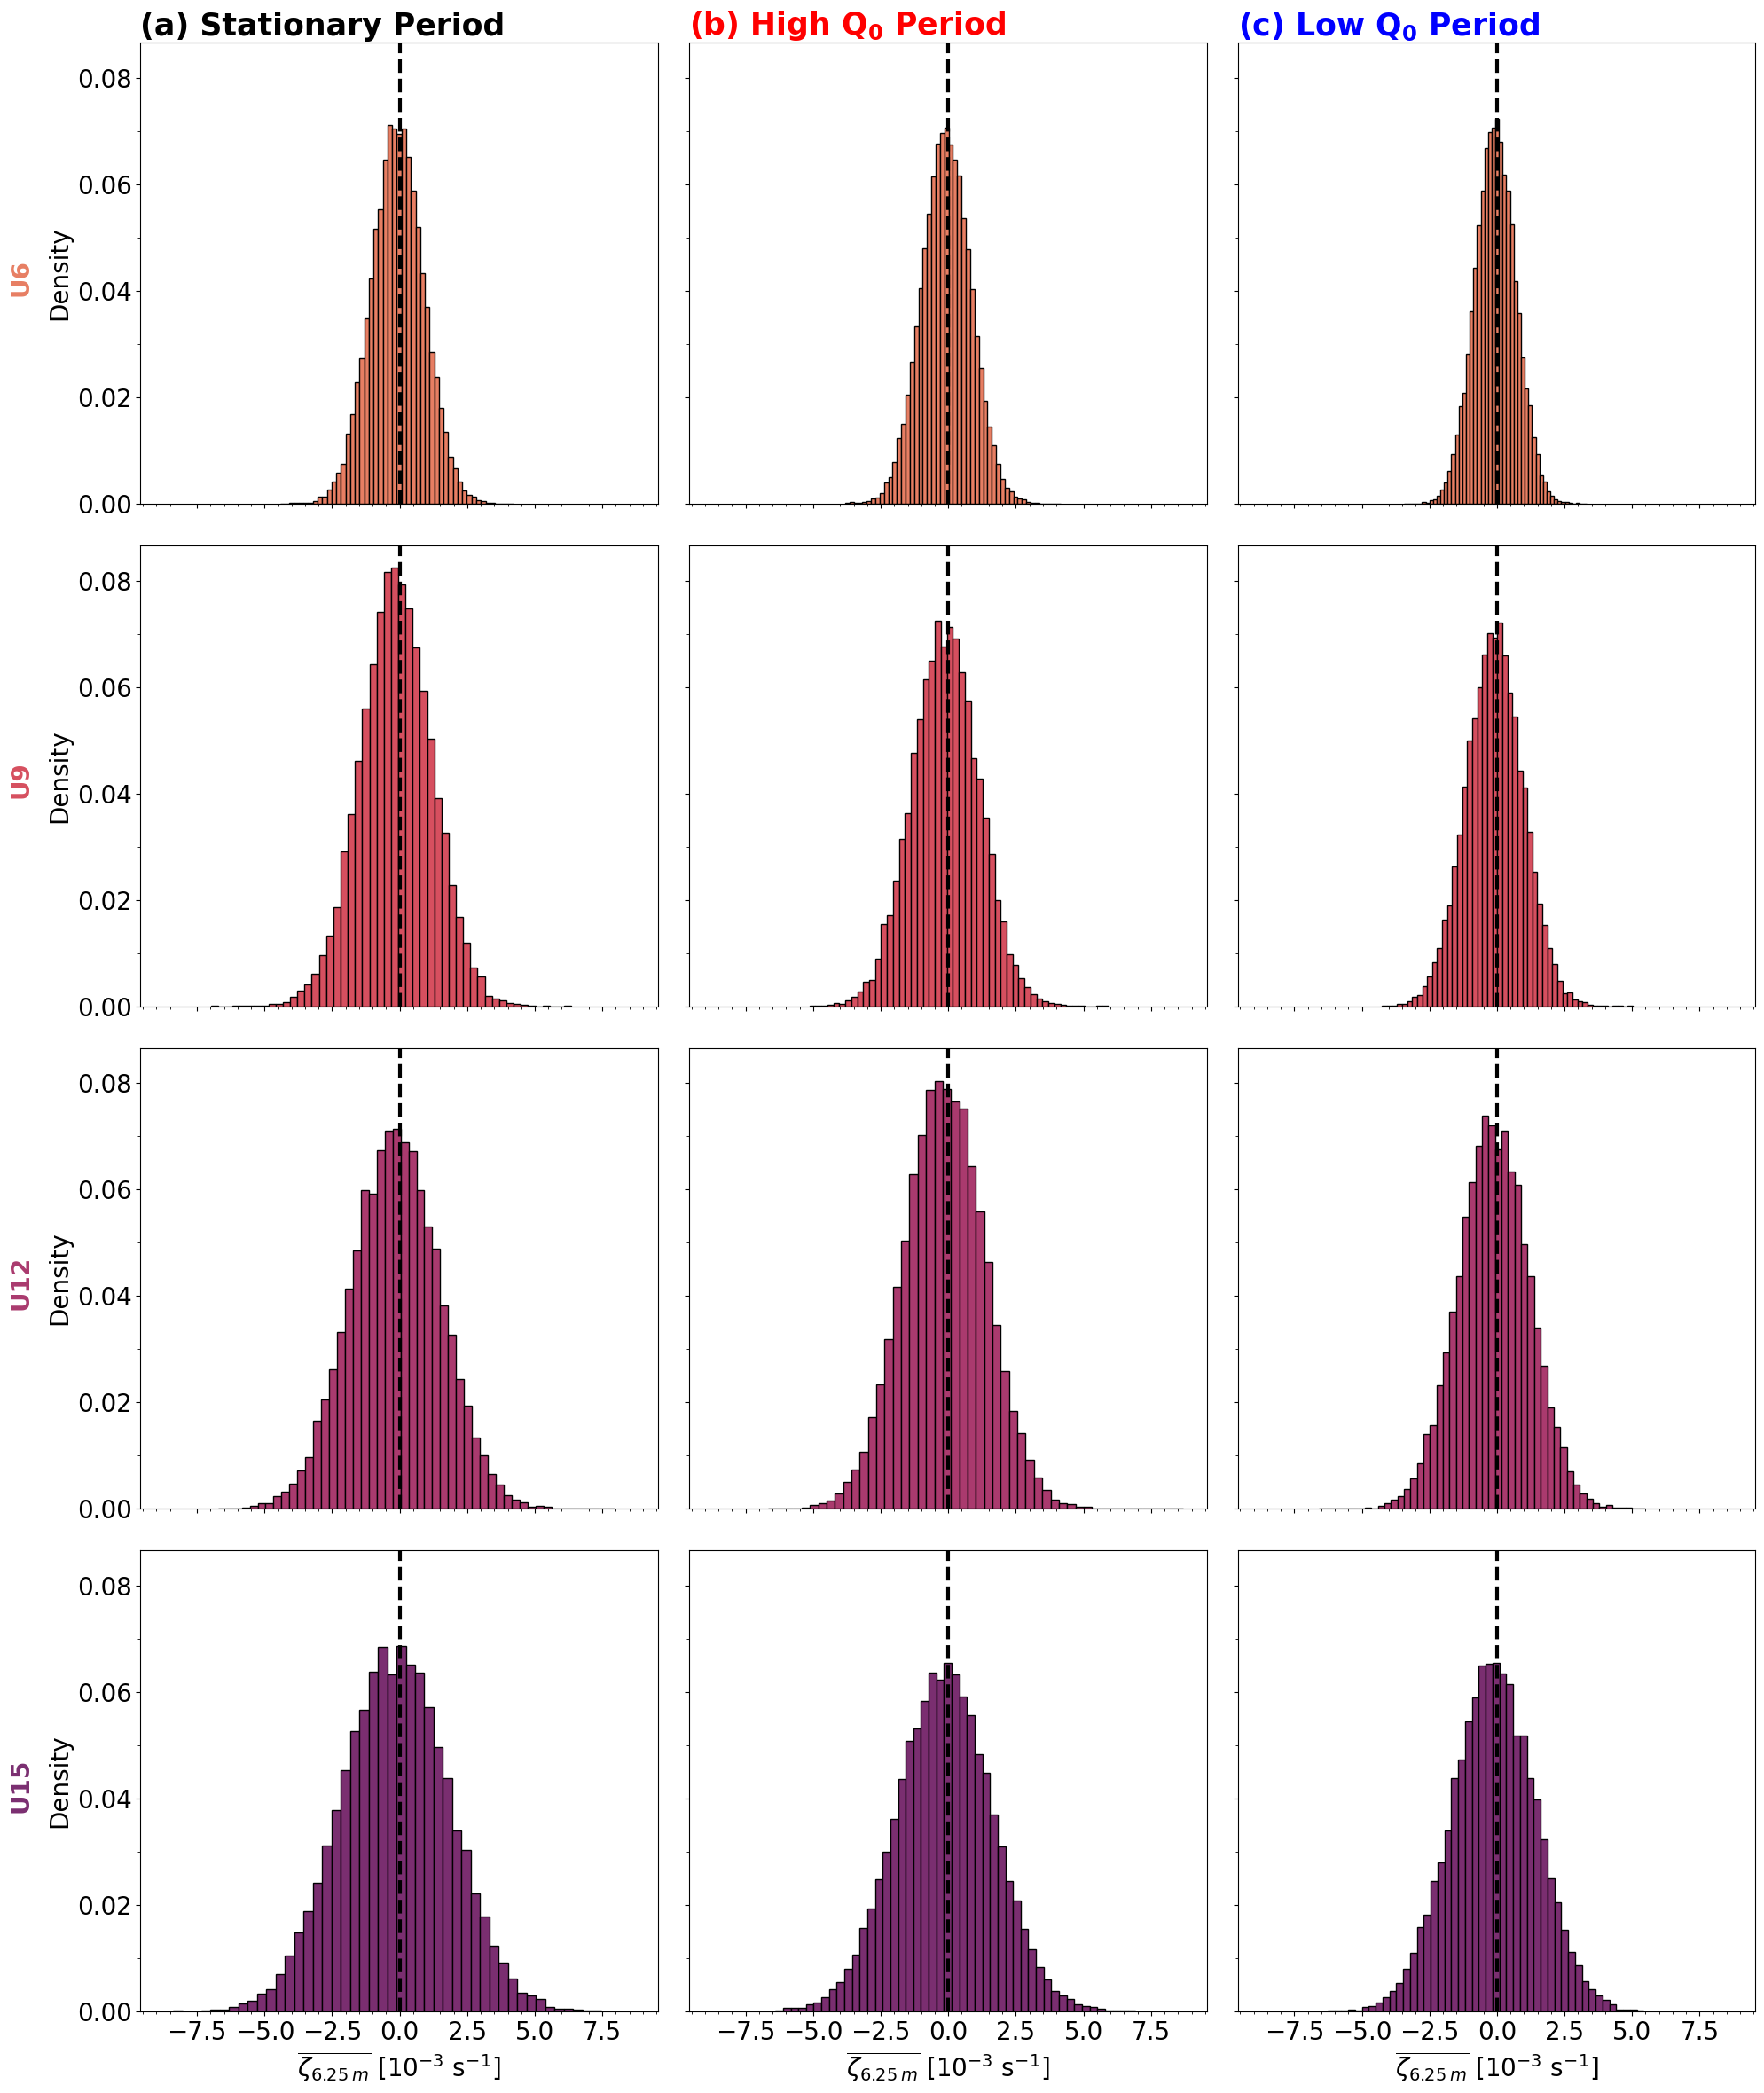

In [18]:
# Plot the PDF
fig, ax = plt.subplots(figsize=(20,24), nrows=4, ncols=3, sharex=True, sharey=True)

for i in range(4):

    # stationary period
    ax[i,0].bar(bin_edges_stat[i,:-1] * 10 ** 3, prob_stat[i], width=bin_width_stat[i] * 10 ** 3, 
                edgecolor='black', color=ug_colors[i])
    ax[i,0].set_ylabel('Density')
    ax[i,0].axvline(x=0, zorder=2, c="black", lw=3, ls="--")

    # high q0 period
    ax[i,1].bar(bin_edges_highq0[i,:-1] * 10 ** 3, prob_highq0[i], width=bin_width_highq0[i] * 10 ** 3, 
                edgecolor='black', color=ug_colors[i])
    ax[i,1].axvline(x=0, zorder=2, c="black", lw=3, ls="--")

    # low q0 period
    ax[i,2].bar(bin_edges_lowq0[i,:-1] * 10 ** 3, prob_lowq0[i], width=bin_width_lowq0[i] * 10 ** 3, 
                edgecolor='black', color=ug_colors[i])
    ax[i,2].axvline(x=0, zorder=2, c="black", lw=3, ls="--")

ax[0,0].set_title('(a) Stationary Period', fontsize=25, loc="left", c="black")
ax[0,1].set_title('(b) High $\\bf{Q_0}$ Period', fontsize=25, loc="left", c="red")
ax[0,2].set_title('(c) Low $\\bf{Q_0}$ Period', fontsize=25, loc="left", c="blue")

ax[3,0].set_xlabel("$\overline{\zeta_{6.25 \\> m}}$ [10$^{-3}$ s$^{-1}$]")
ax[3,1].set_xlabel("$\overline{\zeta_{6.25 \\> m}}$ [10$^{-3}$ s$^{-1}$]")
ax[3,2].set_xlabel("$\overline{\zeta_{6.25 \\> m}}$ [10$^{-3}$ s$^{-1}$]")

ax[0,0].xaxis.set_major_locator(MultipleLocator(2.5))
ax[0,0].xaxis.set_minor_locator(MultipleLocator(0.5))
ax[0,0].yaxis.set_major_locator(MultipleLocator(0.02))
ax[0,0].yaxis.set_minor_locator(MultipleLocator(0.01))

case = ["6", "9", "12", "15"]
for i, iax in enumerate(ax[:,0]):
    iax.text(-14, 0.0425, f"U{case[i]}", 
            rotation=90, fontsize=20, va="center", ha="center", weight="bold", c=ug_colors[i])

plt.tight_layout()

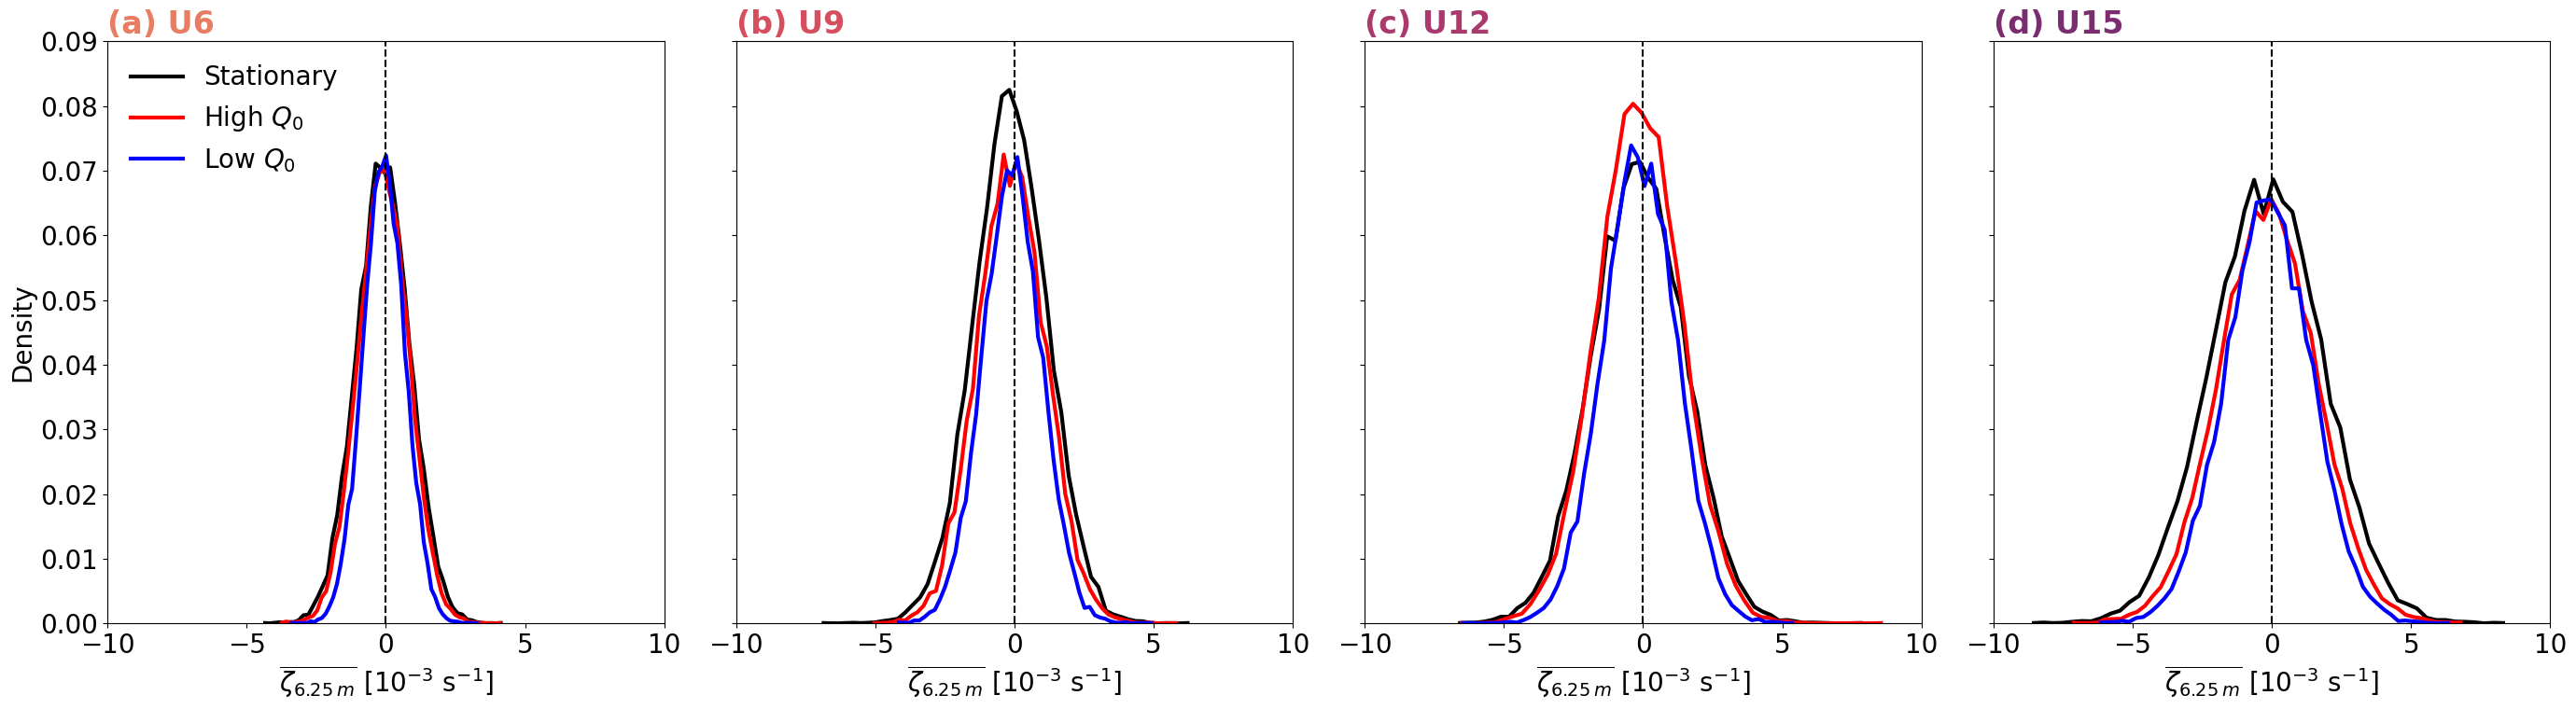

In [19]:
case = ["6", "9", "12", "15"]
lab = "abcd"

fig, ax = plt.subplots(figsize=(28,8), ncols=4, sharex=True, sharey=True)

for i in range(4):

    ax[i].plot(bin_edges_stat[i,:-1] * 10 ** 3, prob_stat[i], 
               c="black", lw=3, label="Stationary")
    ax[i].plot(bin_edges_highq0[i,:-1] * 10 ** 3, prob_highq0[i], 
               c="red", lw=3, label="High $Q_0$")
    ax[i].plot(bin_edges_lowq0[i,:-1] * 10 ** 3, prob_lowq0[i], 
               c="blue", lw=3, label="Low $Q_0$")
    ax[i].set_title(f"({lab[i]}) U{case[i]}", c=ug_colors[i], loc="left")
    ax[i].set_xlabel("$\overline{\zeta_{6.25 \\> m}}$ [10$^{-3}$ s$^{-1}$]")
    ax[i].axvline(x=0, c="black", ls="--", lw=1.5)
    
ax[0].legend(frameon=False, loc="upper left")
ax[0].set_ylim(0,0.09)
ax[0].set_xlim(-10,10)
ax[0].set_ylabel("Density")

plt.tight_layout()

## 2d Autocorrelation

In [20]:
x, y = vort_ac_all[0].x, vort_ac_all[0].y

In [21]:
# clevs = np.linspace(-0.5,0.5001,50)

# fig, ax = plt.subplots(figsize=(24,6), ncols=4, sharex=True, sharey=True)

# for i in range(4):
#     cf = ax[i].contourf(x, y, vort_ac_all[i].zeta3_autocorr2d[:144,:,:,0].mean(dim="time"), 
#                         clevs, cmap=mpl.cm.seismic, extend="both")

# ax[0].set_xlim(-1000,1000)
# ax[0].set_ylim(-1000,1000)

# # cbar = plt.colorbar(cf, ax=ax[3])
# # cbar.set_ticks(np.arange(-0.1,0.1001,0.01))

## Length Scales

Text(0.5, 1.0, "Integral Length Scale of Surface $\\bf{\\zeta}$ in the $\\bf{x'}$ Direction")

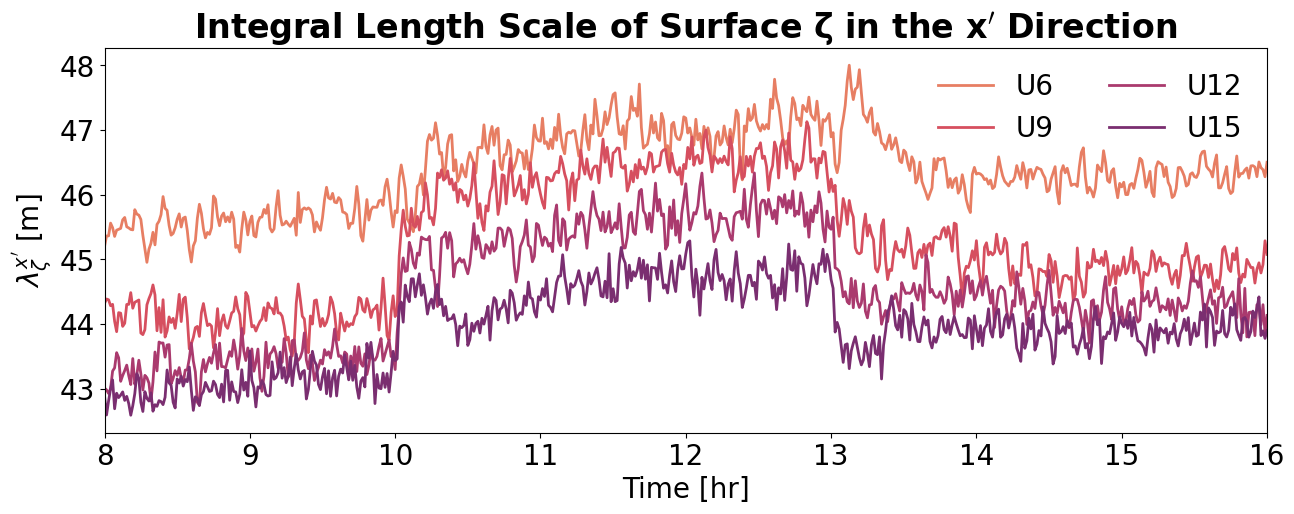

In [22]:
fig, ax = plt.subplots(figsize=(15,5), nrows=1)

cases = ["U6", "U9", "U12", "U15"]

for i, v in enumerate(vort_ls_all):
    # vertical vorticity
    time = v.time
    ls = v.ls_zeta3_rolls[:,0]
    ls_norm = v.ls_zeta3_normal[:,0]
    ax.plot(time, (ls), c=ug_colors[i], label=cases[i], lw=2)
    # # horizontal vorticity
    # time = v.time
    # ls = (v.ls_zeta1_rolls[:,0] ** 2 + v.ls_zeta2_rolls[:,0] ** 2) ** (1/2)
    # ax[1].plot(time.rolling(time=6).mean(), ls.rolling(time=6).mean(), c=ug_colors[i])

ax.legend(frameon=False, ncols=2)
ax.set_ylabel("$\lambda_{\zeta}^{x'}$ [m]")
ax.set_xlim(8,16)
ax.set_xlabel("Time [hr]")
ax.set_title("Integral Length Scale of Surface $\\bf{\zeta}$ in the $\\bf{x'}$ Direction")

# ax.axvline(x=10, c="red", lw=1.5, ls="--", zorder=0)
# ax.axvline(x=13, c="blue", lw=1.5, ls="--", zorder=0)
# ax.text(10.15, 42.75, f"$t_0$", ha="center", va="center", c="red", fontsize=20)
# ax.text(13.15, 42.75, f"$t_1$", ha="center", va="center", c="blue", fontsize=20)

Text(0.5, 1.0, "Integral Length Scale of Surface $\\bf{\\zeta}$ in the $\\bf{y'}$ Direction")

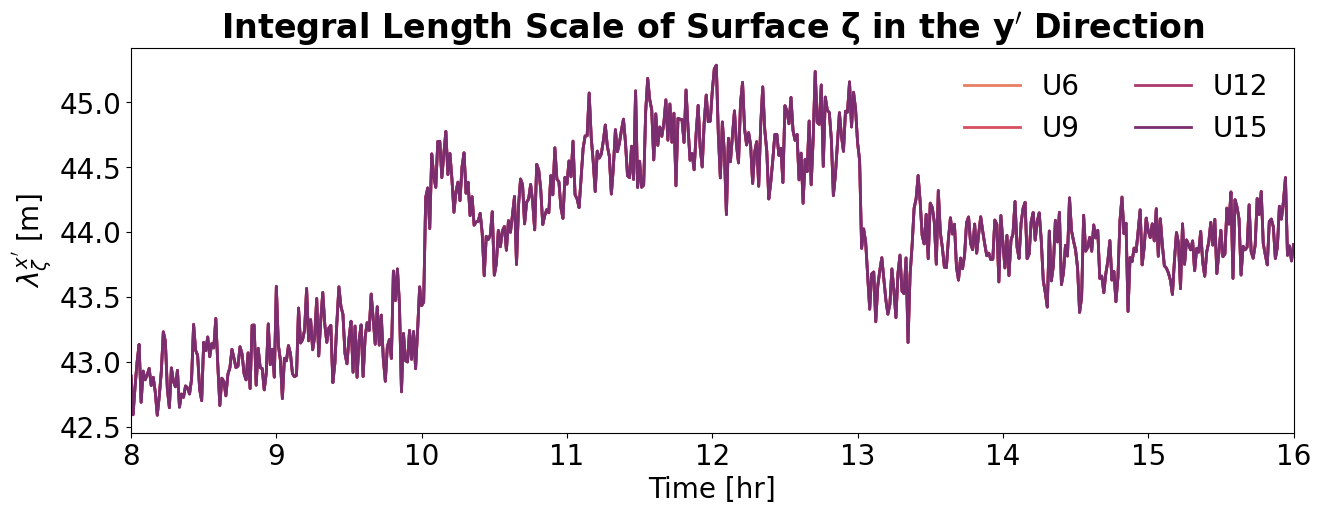

In [23]:
fig, ax = plt.subplots(figsize=(15,5), nrows=1)

cases = ["U6", "U9", "U12", "U15"]

for i, v in enumerate(vort_ls_all):
    # vertical vorticity
    time = v.time
    ls_norm = v.ls_zeta3_normal[:,0]
    ax.plot(time, ls, c=ug_colors[i], label=cases[i], lw=2)
    # # horizontal vorticity
    # time = v.time
    # ls = (v.ls_zeta1_rolls[:,0] ** 2 + v.ls_zeta2_rolls[:,0] ** 2) ** (1/2)
    # ax[1].plot(time.rolling(time=6).mean(), ls.rolling(time=6).mean(), c=ug_colors[i])

ax.legend(frameon=False, ncols=2)
ax.set_ylabel("$\lambda_{\zeta}^{x'}$ [m]")
ax.set_xlim(8,16)
ax.set_xlabel("Time [hr]")
ax.set_title("Integral Length Scale of Surface $\\bf{\zeta}$ in the $\\bf{y'}$ Direction")

# ax.axvline(x=10, c="red", lw=1.5, ls="--", zorder=0)
# ax.axvline(x=13, c="blue", lw=1.5, ls="--", zorder=0)
# ax.text(10.15, 42.75, f"$t_0$", ha="center", va="center", c="red", fontsize=20)
# ax.text(13.15, 42.75, f"$t_1$", ha="center", va="center", c="blue", fontsize=20)

Text(0.5, 1.0, 'Integral Length Scale of Surface $\\bf{\\zeta}$')

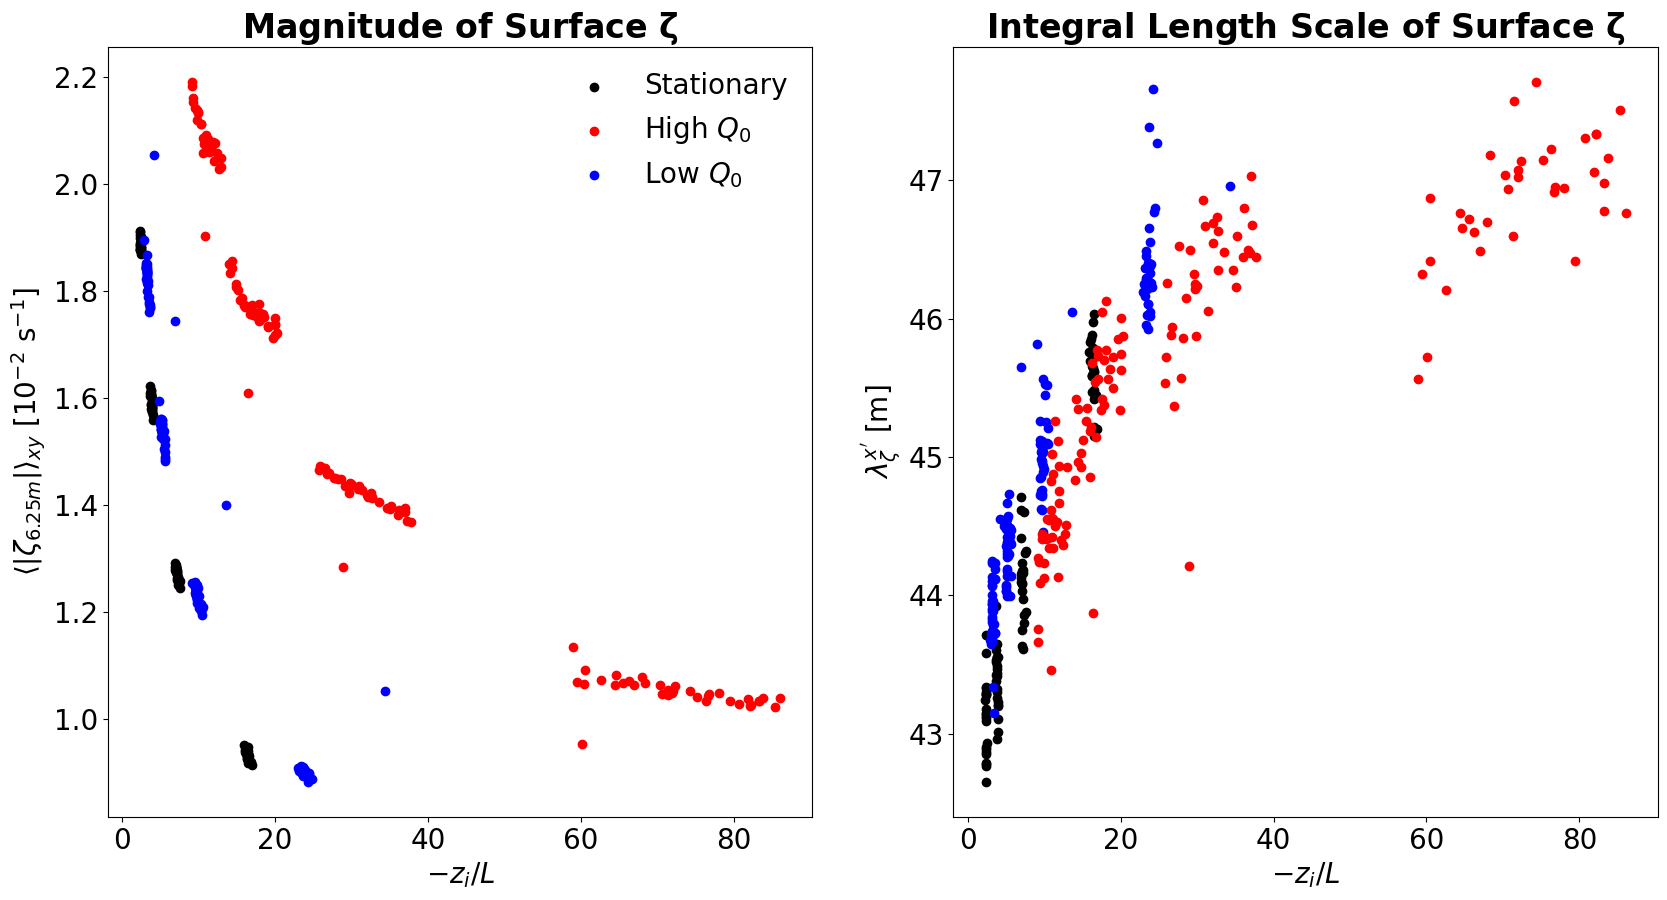

In [24]:
fig, ax = plt.subplots(figsize=(20,10), ncols=2)

spacing = 6
h_idx = 0

# scatter plots
for i in range(4):
    # vorticity magnitude
    ax[0].scatter(s_all[i].zi_L[:144:spacing], 
               vort_all[i].zeta3_abs_mean[:144:spacing,h_idx] * 10 ** 2,
               c=colors2[0])
    ax[0].scatter(s_all[i].zi_L[145:360:spacing],
               vort_all[i].zeta3_abs_mean[145:360:spacing,h_idx] * 10 ** 2,
               c=colors2[1])
    ax[0].scatter(s_all[i].zi_L[361:577:spacing],
               vort_all[i].zeta3_abs_mean[361:577:spacing,h_idx] * 10 ** 2,
               c=colors2[2])
    # vorticity integral length scale
    ax[1].scatter(s_all[i].zi_L[:144:spacing], 
               vort_ls_all[i].ls_zeta3_rolls[:144:spacing,h_idx],
               c=colors2[0])
    ax[1].scatter(s_all[i].zi_L[145:360:spacing],
               vort_ls_all[i].ls_zeta3_rolls[145:360:spacing,h_idx],
               c=colors2[1])
    ax[1].scatter(s_all[i].zi_L[361:577:spacing],
               vort_ls_all[i].ls_zeta3_rolls[361:577:spacing,h_idx],
               c=colors2[2])
    
ax[0].legend(["Stationary", "High $Q_0$", "Low $Q_0$"], frameon=False)

ax[0].set_xlabel("$-z_i / L$")
ax[0].set_ylabel(f"$\\langle | \zeta_{{{s_all[0].z[h_idx].values} m}} | \\rangle_{{xy}}$ [10$^{{-2}}$ s$^{{-1}}$]")
ax[0].set_title("Magnitude of Surface $\\bf{\zeta}$")
ax[1].set_xlabel("$-z_i / L$")
ax[1].set_ylabel("$\lambda_{\zeta}^{x'}$ [m]")
ax[1].set_title("Integral Length Scale of Surface $\\bf{\zeta}$")

In [25]:
h_idx = 0

ug = [6, 9, 12, 15]
zeta = []
for i, (s, v) in enumerate(zip(s_all, vort_all)):
    for value in v.zeta3_abs_mean[:,h_idx].values * 10 ** 2:
        zeta.append((ug[i], value))
df_zeta = pd.DataFrame(zeta, columns=['ug', 'value'])

ug = [6, 9, 12, 15]
ls = []
for i, (s, v) in enumerate(zip(s_all, vort_ls_all)):
    ls_rat = v.ls_zeta3_rolls[:, h_idx].values# / v.ls_zeta3_normal[:,h_idx].values
    for value in ls_rat:
        ls.append((ug[i], value))
df_ls = pd.DataFrame(ls, columns=['ug', 'value'])
# Replace infinities with NaN
# df_ls.replace([float('inf'), float('-inf')], np.nan, inplace=True)
# # Drop rows with NaNs
# df_ls = df_ls.dropna()

Text(0.5, 1.0, 'Integral Length Scale of Surface $\\bf{\\zeta}$')

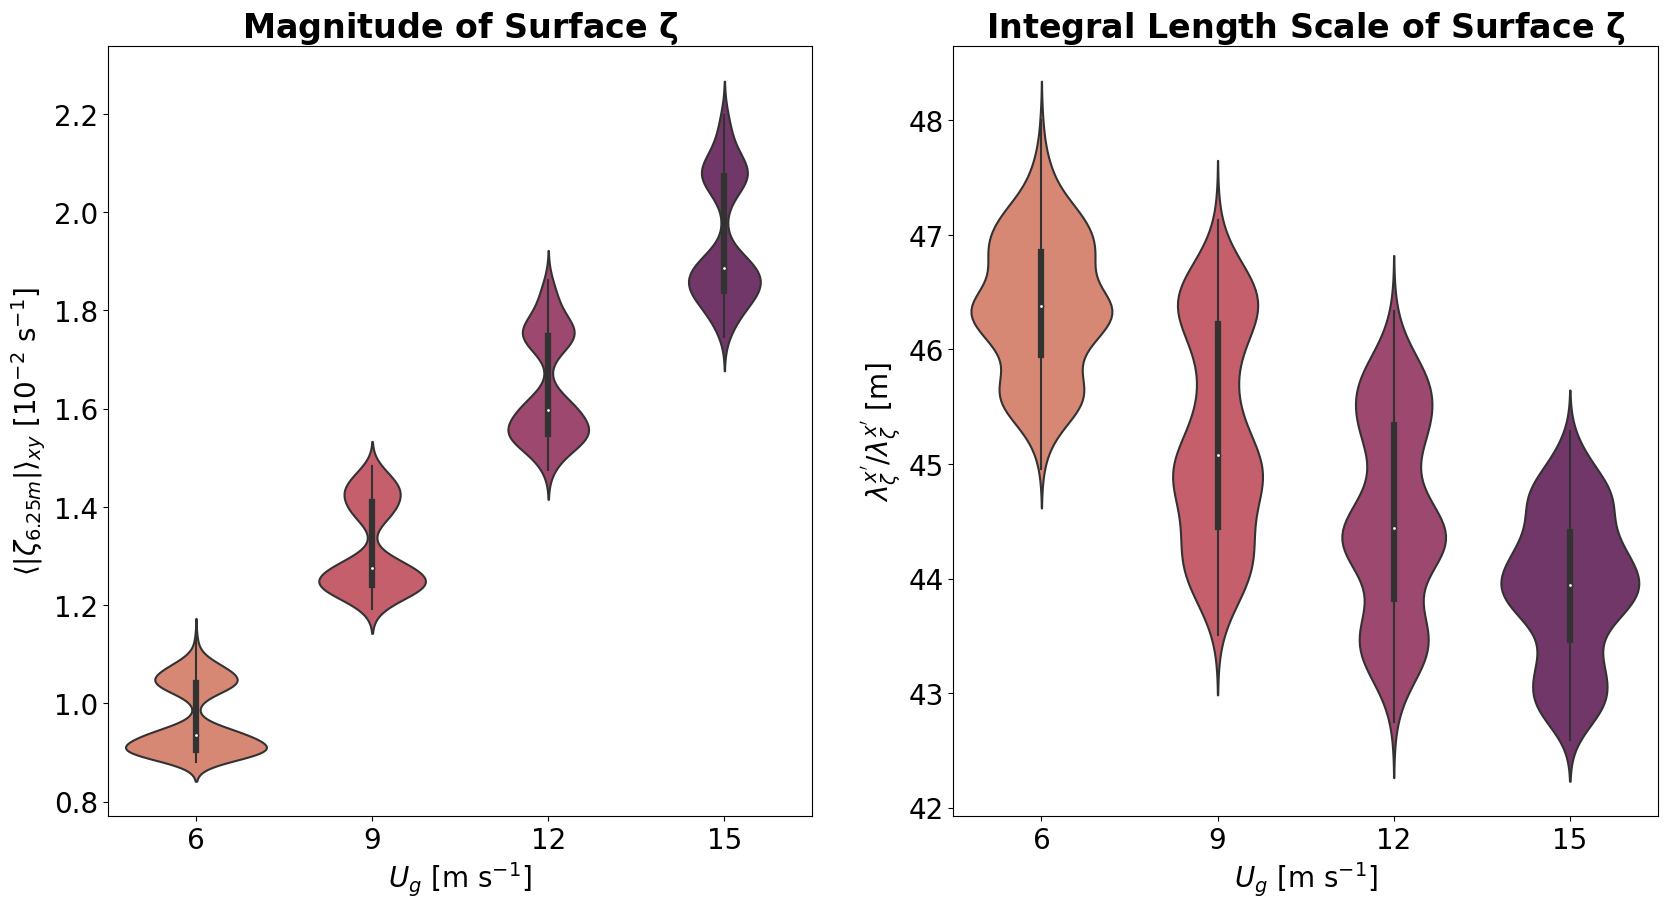

In [26]:
fig, ax = plt.subplots(figsize=(20,10), ncols=2)

sns.violinplot(x='ug', y='value', data=df_zeta, ax=ax[0], palette=ug_colors)
sns.violinplot(x='ug', y='value', data=df_ls.fillna(value=0), ax=ax[1], palette=ug_colors)

ax[0].set_xlabel("$U_g$ [m s$^{-1}$]")
ax[0].set_ylabel(f"$\\langle | \zeta_{{{s_all[0].z[h_idx].values} m}} | \\rangle_{{xy}}$ [10$^{{-2}}$ s$^{{-1}}$]")
ax[0].set_title("Magnitude of Surface $\\bf{\zeta}$")
ax[1].set_xlabel("$U_g$ [m s$^{-1}$]")
ax[1].set_ylabel("$\lambda_{\zeta}^{x'} / \lambda_{\zeta}^{x'}$ [m]")
ax[1].set_title("Integral Length Scale of Surface $\\bf{\zeta}$")